In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()

# Story of the Data

We are given some kind of a normalised score $x_i$ such that, $x_i \in [-1,1]$ of two tests for each student and a categorical feture named 'Qualified'. We would want to build a classification system that learns from this data and predicts the outcome for a student (qualified or not) based on new test scores. 

In [2]:
# Read data 

df = pd.read_csv('./data/ex2data2.txt',index_col=None,names=['test1','test2','qualified'])

In [3]:
df.head()
# Data loaded !

,test1,test2,qualified
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [4]:
df.info() 
# no null values !

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   test1      118 non-null    float64
 1   test2      118 non-null    float64
 2   qualified  118 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.9 KB


In [5]:
df.describe()

# Turns out that the range of scores is between (-0.9 and 1.2). Need to look at data more carefully :))

,test1,test2,qualified
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646562,1.000000
max,1.070900,1.108900,1.000000


## Understanding the distribution of data

<AxesSubplot:xlabel='qualified', ylabel='count'>

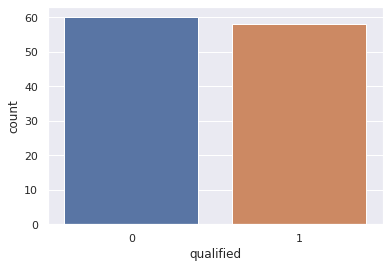

In [6]:
sns.countplot(df.qualified)

# equal number of students qualified and did not qualify
# The distribution is not biased towards a specific class

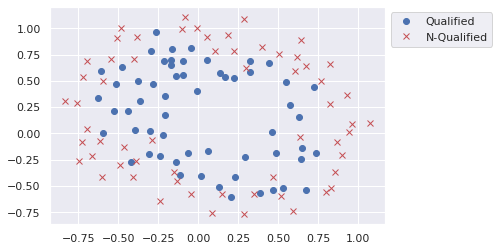

In [7]:
qualified = df[df.qualified == 1]
nqualified = df[df.qualified == 0]

plt.plot(qualified.test1,qualified.test2,'bo',label='Qualified')
plt.plot(nqualified.test1,nqualified.test2,'rx',label='N-Qualified')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

- Looks like the data is spherically symmetric ! 
- Qualified students have test scores thast seem to live inside some circle with a given centre and a given radius while the students who did not qualify the test have scores that lie outside the circle. 
- Our job is to use this data to learn the parameters that represent this 'circle' aka **Decision Boundry**

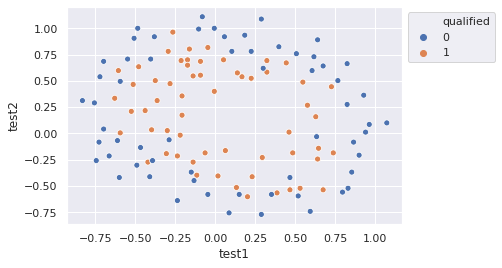

In [8]:
sns.scatterplot(x='test1',y='test2',hue='qualified',data=df)
plt.legend(bbox_to_anchor=(1,1))

## Building the Machine Learning Model

### Logistic Regression for binary classification

- Here we want to predict the outcome of a categorical variable 'y' that can take only two values based on the input data, namely, '0' or '1' vice-versa 'no' or 'yes'
- For our prediction to be between (0,1), we need to scale our input data or pass it through some filter that outputs a number between (0,1): 
    - Enter Sigmoid function ! 
    - The Sigmoid function given here by g(x) returns output betweeen (0,1) : \newline
    $$g(x) = \frac{1}{1+e^{-x}}$$
    - Like the sigmoid function we could also use the $tanh$ function but we will only the former here. 
    
       
- We need to dry out that details of such a classification problem and extrac the meaty-abstract math to build a classification algorithm.
- We want to interpret the output y as the probability that y=1 given the input data 'x'. In terms of the theory of probability, this can be written as $\hat{y} = P(y=1 | x)$
    - In other words, if y=1, then $\hat{y} = 1 \rightarrow  P(y(x))$
    - if y=0, then P(y(x)) = $1 - \hat{y}$
    
- We can summarise the previous two cases as : 
$$P(y(x)) = \hat{y}^y . (1-\hat{y})^{(1-y)}$$
- Since the logarithm is a strictly monotonic function, we define an overall cost function by summing up across all training data as: 
$$J = \frac{1}{m}\sum_{i=1}^{m} \left( y_i \log{y_i} + (1-y_i)\log{(1-y_i)}\right)$$

We perform Gradient descent on this cost function to minimize the cost and ge the appropriate parameters. 

In [9]:
# Consider the sigmoid function here

def sigmoid(x): 
    output = 1/(1+np.exp(-x))
    return output

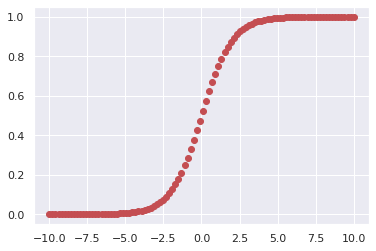

In [10]:
a = np.linspace(-10,10,100)
b = sigmoid(a)
plt.plot(a,b,'ro')

# The output 'b' of the array from (-10,10) is between (0,1)

Like the previous examples, we want to estimate a parameter set $\bar{\theta}$ such that $g(X*\theta)$ is as close to 'y' as possible. For this, we define our cost function and perform gradient descent on it. 

In [11]:
def cost_function(X,Y,theta):
    
   # Take in numpy array of theta, X, and y to return the
   # cost for binary logistic regression
    
    y_pred = X@theta
    error = y*np.log(y_pred)+(1-y)*np.log(1-y_pred)
    cost = -np.mean(error)
    
    return cost

def get_gradients(X,Y,theta):
    m = len(X)
    y_pred = X@theta
    grad_theta = np.zeros((len(theta),1))
    
    return None
    

In [12]:
X = df.iloc[:,:-1].values
X = np.hstack((X,np.ones((X.shape[0])).reshape(X.shape[0],1)))
Y = df.iloc[:,-1].values

---